## Lab 5: Introduction to Reinforcement Learning (RL)

### **Objective**:
In this lab, you will get hands-on experience with basic concepts of Reinforcement Learning (RL), focusing on environments, agents, rewards, and actions. You will implement and train an agent using the Q-Learning algorithm in a grid world environment. The lab will also introduce the OpenAI Gym library for simulating RL environments.

### Prerequisites:

•	Basic Python programming

•	Understanding of Reinforcement Learning concepts from the class lecture

•	Required Libraries: numpy, matplotlib, gym

### **1. Introduction to Reinforcement Learning (RL) Environment**

Reinforcement learning involves an agent interacting with an environment to achieve a goal by maximizing cumulative rewards. OpenAI Gym provides pre-built environments for RL experiments. We will start by simulating a simple GridWorld environment.


#### **Step 1.1: Install and Import Libraries**



In [1]:
# Install OpenAI Gym (if not installed)
%pip install gym
# Import necessary libraries
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import time

Note: you may need to restart the kernel to use updated packages.


#### **Step 1.2 Create the Environment**

We will use OpenAI Gym’s FrozenLake environment, a simple GridWorld environment where the agent navigates a grid to reach a goal, avoiding holes.

In [2]:
# Load the FrozenLake environment from Gym
env = gym.make("FrozenLake-v1", is_slippery=False)  # is_slippery=False removes randomness

# Reset the environment to its initial state
env.reset()

# Render the environment
env.render()

/workspaces/Advanced-ML-I/.venv/lib/python3.8/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


#### **Step 1.3 Understand the Environment**

•	State Space: The grid has 16 states, from 0 to 15.

•	Action Space: The agent can move in 4 directions: left, right, up, down.

•	Reward: The agent receives a reward of 1 when it reaches the goal (state 15) and 0 for other steps.

In [3]:
# Print state and action space
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
# Mapping of actions
action_dict = {
    0: 'Left',
    1: 'Down',
    2: 'Right',
    3: 'Up'
}

State Space: Discrete(16)
Action Space: Discrete(4)


### **2. Q-Learning Algorithm**

Q-Learning is a model-free reinforcement learning algorithm used to find an optimal action-selection policy for an agent. The goal is to learn the Q-value function, which estimates the maximum cumulative reward the agent can achieve from each state-action pair.

#### **Q-Learning Formula**

$Q(s,a)←Q(s,a)+α[r+γ\max_{a'} Q(s',a')−Q(s,a)]$

Where:

•	$Q(s,a)$ is the current estimate of the Q-value for state s and action a.

•	$r$ is the reward received after taking action a from state s.

•	$α$ is the discount factor, which controls the importance of future rewards.

•	$γ$ is the learning rate, which controls how much new information overrides old information.

### **3. Implementing Q-Learning**


#### **Step 3.1: Initialize Parameters**


In [4]:
# Initialize Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Set hyperparameters
alpha = 0.8        # Learning rate
gamma = 0.95       # Discount factor
epsilon = 1.0      # Exploration rate (initially, 100% exploration)
epsilon_min = 0.1  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for epsilon

# Training settings
num_episodes = 2000
max_steps_per_episode = 100

# For plotting metrics
rewards_all_episodes = []

#### **Step 3.2 Epsilon-Greedy Policy**

Exploration allows the agent to discover unknown paths by choosing random actions, while exploitation maximizes reward based on current knowledge of the Q-values.

$\epsilon$-greedy exploration balances the two:

$\text{Action} =
\begin{cases}
\text{Random Action} & \text{with probability } \epsilon \\
\text{Best Known Action} & \text{with probability } 1-\epsilon
\end{cases}$



In [5]:
def choose_action(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore: choose a random action
    else:
        return np.argmax(Q[state, :])  # Exploit: choose the action with the highest Q-value

#### **Step 3.4 Q-Learning Algorithm**


In [6]:
# Q-learning algorithm
for episode in range(num_episodes):
    state_tup = env.reset()  # Reset the environment for each episode
    state = state_tup[0]
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        action = choose_action(state, Q, epsilon)
        new_state, reward, done, info, annex = env.step(action)
    
        # Update Q-value using the Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        rewards_current_episode += reward

        if done:  # End the episode if the agent reaches the goal or falls in a hole
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Save total rewards for the current episode
    rewards_all_episodes.append(rewards_current_episode)

print("Training complete!")

Training complete!


#### **Step 3.4 Visualizing Training Performance**

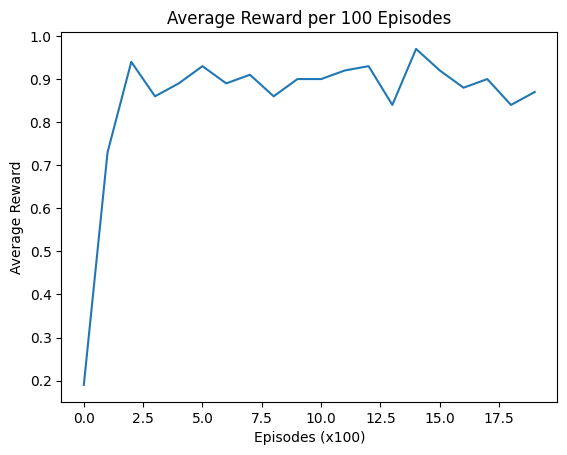

In [7]:
# Calculate and plot average reward per hundred episodes
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
rewards_avg = [np.mean(r) for r in rewards_per_hundred_episodes]

plt.plot(rewards_avg)
plt.title('Average Reward per 100 Episodes')
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.show()

### **4. Evaluating the Trained Agent**

Once the agent has been trained, you can evaluate its performance by letting it navigate the environment with the learned Q-values.

#### **Step 4.1: Run the Trained Agent**

In [8]:
for episode in range(5):  # Run for 5 episodes
    state_tup = env.reset()
    state = state_tup[0]
    done = False
    print(f"Episode {episode + 1}\n\n")
    env.render()
    time.sleep(1)

    for step in range(max_steps_per_episode):
        action = np.argmax(Q[state, :])  # Choose the action with the highest Q-value
        new_state, reward, done, info, annex = env.step(action)

        env.render()
        time.sleep(1)

        if done:
            if reward == 1:
                print("\nGoal reached!")
            else:
                print("\nFell in a hole!")
            time.sleep(2)
            break

        state = new_state

Episode 1



Goal reached!
Episode 2



Goal reached!
Episode 3



Goal reached!
Episode 4



Goal reached!
Episode 5



Goal reached!


### **5. Hyperparameter Tuning**

Experiment with different values of alpha, gamma, and epsilon to observe how they affect the learning process.

#### **Step 5.1: Adjust Hyperparameters**

•	Increase or decrease the learning rate (alpha) to see its effect on the convergence speed.

•	Change the discount factor (gamma) to prioritize immediate or future rewards.

•	Experiment with the exploration-exploitation trade-off (epsilon) by adjusting epsilon_decay.

Training complete!


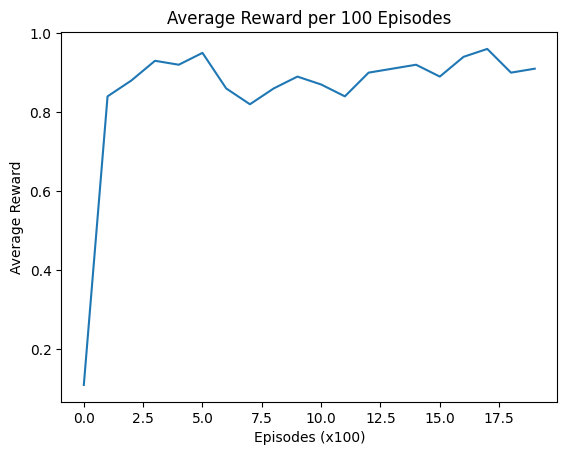

In [19]:
# Load the FrozenLake environment from Gym
env = gym.make("FrozenLake-v1", is_slippery=False)  # is_slippery=False removes randomness

# Reset the environment to its initial state
env.reset()

# Render the environment
env.render()
# Initialize Q-table with zeros
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Try new values
alpha = 0.7        # New learning rate
gamma = 0.9       # New discount factor

epsilon = 1.0      # Exploration rate (initially, 100% exploration)
epsilon_min = 0.1  # Minimum exploration rate
epsilon_decay = 0.99  # Decay rate for epsilon

# Training settings
num_episodes = 2000
max_steps_per_episode = 100

# For plotting metrics
rewards_all_episodes = []
# Q-learning algorithm
for episode in range(num_episodes):
    state_tup = env.reset()  # Reset the environment for each episode
    state = state_tup[0]
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        action = choose_action(state, Q, epsilon)
        new_state, reward, done, info, annex = env.step(action)
    
        # Update Q-value using the Q-Learning formula
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        rewards_current_episode += reward
        if done:  # End the episode if the agent reaches the goal or falls in a hole
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    # Save total rewards for the current episode
    rewards_all_episodes.append(rewards_current_episode)
    
print("Training complete!")

# Calculate and plot average reward per hundred episodes
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 100)
rewards_avg = [np.mean(r) for r in rewards_per_hundred_episodes]

plt.plot(rewards_avg)
plt.title('Average Reward per 100 Episodes')
plt.xlabel('Episodes (x100)')
plt.ylabel('Average Reward')
plt.show()

#### **Step 5.2 Discussion** 

•	How does changing the learning rate affect the training performance?

•	Does increasing or decreasing the discount factor help the agent reach the goal more efficiently?

•	What happens if you reduce the exploration rate too quickly?

### **6. Visualizing the Q-Table**

Finally, let’s visualize the learned Q-values to understand how the agent makes decisions in different states.

•	The Q-table represents the agent’s knowledge of the environment.

•	Size:  $|S| \times |A|$  (states × actions).

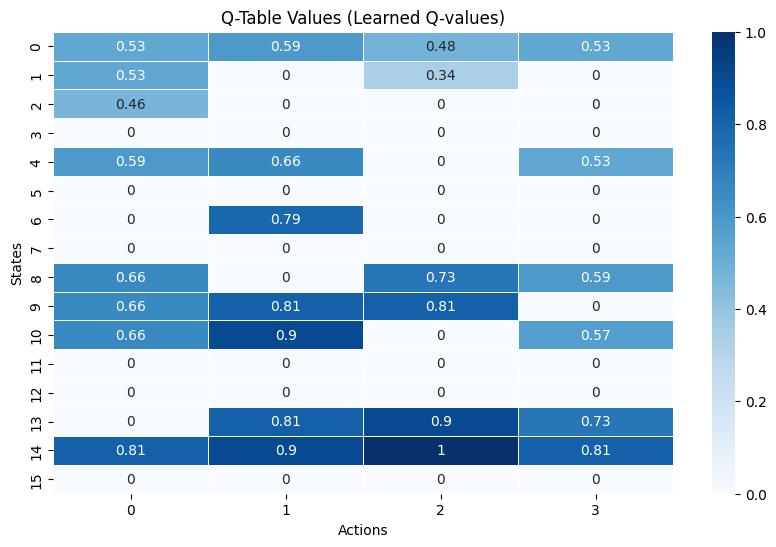

In [20]:
# Visualize the learned Q-values
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(Q, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Q-Table Values (Learned Q-values)')
plt.xlabel('Actions')
plt.ylabel('States')
plt.show()

### **7. Individual Class Work**

Repeat the above analysis with another RL environment provided by OpenAI Gym, such as Taxi-v3 or CartPole-v1. Implement Q-Learning for these environments and compare the difficulty and learning process.

/workspaces/Advanced-ML-I/.venv/lib/python3.8/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Run: 0 Average: 13.0 Min: 13 Max: 13
Run: 400 Average: 24.31 Min: 8 Max: 106
Run: 800 Average: 34.615 Min: 9 Max: 131
Run: 1200 Average: 61.1 Min: 11 Max: 179
Run: 1600 Average: 90.275 Min: 11 Max: 357
Run: 2000 Average: 129.3075 Min: 13 Max: 343
Run: 2400 Average: 161.775 Min: 14 Max: 321
Run: 2800 Average: 187.9025 Min: 93 Max: 377
Run: 3200 Average: 172.21 Min: 110 Max: 317
Run: 3600 Average: 171.1475 Min: 106 Max: 264
Run: 4000 Average: 163.8125 Min: 108 Max: 319
Run: 4400 Average: 160.725 Min: 106 Max: 274
Run: 4800 Average: 163.93 Min: 101 Max: 252


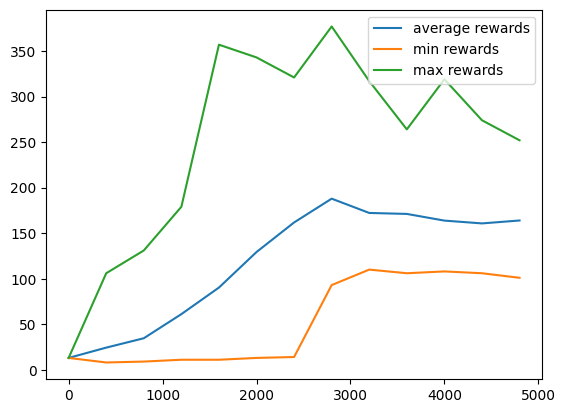

In [21]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v1')

# How much new info will override old info. 0 means nothing is learned, 1 means only most recent is considered, old knowledge is discarded
LEARNING_RATE = 0.1
# Between 0 and 1, mesue of how much we carre about future reward over immedate reward
DISCOUNT = 0.95
RUNS = 5000  # Number of iterations run
SHOW_EVERY = 2000  # How oftern the current solution is rendered
UPDATE_EVERY = 400  # How oftern the current progress is recorded

# Exploration settings
epsilon = 1  # not a constant, going to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)


# Create bins and Q table
def create_bins_and_q_table():
	# env.observation_space.high
	# [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
	# env.observation_space.low
	# [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]

	# remove hard coded Values when I know how to

	numBins = 20
	obsSpaceSize = len(env.observation_space.high)

	# Get the size of each bucket
	bins = [
		np.linspace(-4.8, 4.8, numBins),
		np.linspace(-4, 4, numBins),
		np.linspace(-.418, .418, numBins),
		np.linspace(-4, 4, numBins)
	]

	qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

	return bins, obsSpaceSize, qTable


# Given a state of the enviroment, return its descreteState index in qTable
def get_discrete_state(state, bins, obsSpaceSize):
	stateIndex = []
	for i in range(obsSpaceSize):
		stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
	return tuple(stateIndex)


bins, obsSpaceSize, qTable = create_bins_and_q_table()

previousCnt = []  # array of all scores over runs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}  # metrics recorded for graph

for run in range(RUNS):
	discreteState = get_discrete_state(env.reset()[0], bins, obsSpaceSize)
	done = False  # has the enviroment finished?
	cnt = 0  # how may movements cart has made

	while not done:
		if run % SHOW_EVERY == 0:
			env.render()  # if running RL comment this out

		cnt += 1
		# Get action from Q table
		if np.random.random() > epsilon:
			action = np.argmax(qTable[discreteState])
		# Get random action
		else:
			action = np.random.randint(0, env.action_space.n)
		newState, reward, done, _, _ = env.step(action)  # perform action on enviroment

		newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

		maxFutureQ = np.max(qTable[newDiscreteState])  # estimate of optiomal future value
		currentQ = qTable[discreteState + (action, )]  # old value

		# pole fell over / went out of bounds, negative reward
		if done and cnt < 200:
			reward = -375

		# formula to caculate all Q values
		newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
		qTable[discreteState + (action, )] = newQ  # Update qTable with new Q value

		discreteState = newDiscreteState

	previousCnt.append(cnt)

	# Decaying is being done every run if run number is within decaying range
	if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
		epsilon -= epsilon_decay_value

	# Add new metrics for graph
	if run % UPDATE_EVERY == 0:
		latestRuns = previousCnt[-UPDATE_EVERY:]
		averageCnt = sum(latestRuns) / len(latestRuns)
		metrics['ep'].append(run)
		metrics['avg'].append(averageCnt)
		metrics['min'].append(min(latestRuns))
		metrics['max'].append(max(latestRuns))
		print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))


env.close()

# Plot graph
plt.plot(metrics['ep'], metrics['avg'], label="average rewards")
plt.plot(metrics['ep'], metrics['min'], label="min rewards")
plt.plot(metrics['ep'], metrics['max'], label="max rewards")
plt.legend(loc=1)
plt.show()

### **8. Homework**

Implement the SARSA (State-Action-Reward-State-Action) algorithm and compare its performance with Q-Learning in the FrozenLake environment. Analyze the difference in policy learning.

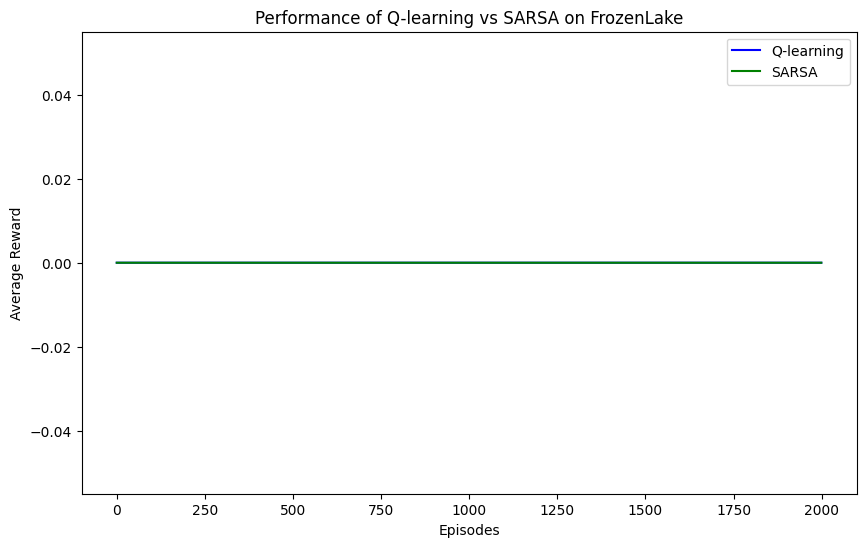

In [54]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Setup environment
env = gym.make('FrozenLake-v1', is_slippery=False)  # No randomness (deterministic)

# Q-learning hyperparameters
LEARNING_RATE = 0.1
DISCOUNT = 0.5
EPISODES = 2000
MAX_STEPS = 100
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.99

# Initialize Q-table for both algorithms
Q_sarsa = np.zeros((env.observation_space.n, env.action_space.n))
Q_qlearning = np.zeros((env.observation_space.n, env.action_space.n))

# Function to choose action (epsilon-greedy)
def choose_action(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

# Function to implement Q-learning
def q_learning():
    global epsilon
    rewards_all_episodes = []
    
    for episode in range(EPISODES):
        state = env.reset()[0]  # Reset the environment
        done = False
        total_rewards = 0
        
        for step in range(MAX_STEPS):
            action = choose_action(state, Q_qlearning, epsilon)
            next_state, reward, done, truncated, _ = env.step(action)
            
            # Update Q-value
            Q_qlearning[state, action] += LEARNING_RATE * (reward + DISCOUNT * np.max(Q_qlearning[next_state]) - Q_qlearning[state, action])
            
            state = next_state
            total_rewards += reward
            
            if done or truncated:
                break

        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        rewards_all_episodes.append(total_rewards)
    
    return rewards_all_episodes

# Function to implement SARSA
def sarsa():
    global epsilon
    rewards_all_episodes = []
    
    for episode in range(EPISODES):
        state = env.reset()[0]  # Reset the environment
        done = False
        total_rewards = 0
        action = choose_action(state, Q_sarsa, epsilon)  # Choose first action
        
        for step in range(MAX_STEPS):
            next_state, reward, done, truncated, _ = env.step(action)
            next_action = choose_action(next_state, Q_sarsa, epsilon)  # Choose next action using epsilon-greedy
            
            # Update Q-value
            Q_sarsa[state, action] += LEARNING_RATE * (reward + DISCOUNT * Q_sarsa[next_state, next_action] - Q_sarsa[state, action])
            
            state, action = next_state, next_action
            total_rewards += reward
            
            if done or truncated:
                break
        
        # Decay epsilon
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        rewards_all_episodes.append(total_rewards)
    
    return rewards_all_episodes

# Train using Q-learning and SARSA
qlearning_rewards = q_learning()
sarsa_rewards = sarsa()

# Plot the results
plt.figure(figsize=(10, 6))

# Plot rewards for Q-learning and SARSA
plt.plot(np.arange(EPISODES), np.cumsum(qlearning_rewards) / (np.arange(EPISODES) + 1), label="Q-learning", color='blue')
plt.plot(np.arange(EPISODES), np.cumsum(sarsa_rewards) / (np.arange(EPISODES) + 1), label="SARSA", color='green')

plt.title("Performance of Q-learning vs SARSA on FrozenLake")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.legend()
plt.show()